In [16]:
"""
Imports de librairies
"""
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import numpy as np
import math
import scipy.stats
import random 
import scipy
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import community

In [7]:
"""
Spec des fichiers :
    h1 is the household of member 1; h1=[L, F, E, B, H]
    m1 is the anonymous ID number of member 1;
    h2 is the household of member 2; h2=[L, F, E, B, H]
    m2 is the anonymous ID number of member 2;
    age1 is the age of member 1; age1 = [0, 1, 2, 3, 4]
    age2 is the age of member 2; age2 = [0, 1, 2, 3, 4]
    sex1 is the gender of member 1; sex1 = [F, M]
    sex2 is the gender of member 2; sex2 = [F, M]
    duration is the duration of the contact event in seconds;
    day is the day of experiment; day = [1, 2, 3]
    hour is the day time of the contact event; hour = [7 – 20]

Variables Dictionary
========

Households.
There are 5 households in the dataset. They are labelled as L, F, E, B and H, by increasing size.
Members of households L, F and E wore the sensors during overlapping time windows.

Age.
Membersâ€™ age is indicated with numbers from 0 to 4 corresponding the following age brackets:
0 - from 0 to 5 years old;
1 - from 6 to 14 years old;
2 - from 15 to 19 years old;
3 - from 20 to 49 years old;
4 - 50 and older.

Day of experiment.
Contact data has been collected over three consecutive days for each household that are indicated as Day 1, Day 2, Day 3 and correspond to:
L = [25/04/2012, 26/04/2012, 27/04/2012]
F = [26/04/2012, 27/04/2012, 28/04/2012]
E = [27/04/2012, 28/04/2012, 29/04/2012]
B = [03/05/2012, 04/05/2012, 05/05/2012]
H = [09/05/2012, 10/05/2012, 11/05/2012]

Hour.
Only contact events recorded between 6am and 8pm are reported.
Hours are indicated by integers corresponding to the end of the time interval:
- 7 = from 6am to 7am
- 8 = from 7am to 8am
â€¦
- 20 = from 7pm to 8pm

"""

'\nSpec des fichiers :\n    h1 is the household of member 1; h1=[L, F, E, B, H]\n    m1 is the anonymous ID number of member 1;\n    h2 is the household of member 2; h2=[L, F, E, B, H]\n    m2 is the anonymous ID number of member 2;\n    age1 is the age of member 1; age1 = [0, 1, 2, 3, 4]\n    age2 is the age of member 2; age2 = [0, 1, 2, 3, 4]\n    sex1 is the gender of member 1; sex1 = [F, M]\n    sex2 is the gender of member 2; sex2 = [F, M]\n    duration is the duration of the contact event in seconds;\n    day is the day of experiment; day = [1, 2, 3]\n    hour is the day time of the contact event; hour = [7 – 20]\n\nVariables Dictionary\n========\n\nHouseholds.\nThere are 5 households in the dataset. They are labelled as L, F, E, B and H, by increasing size.\nMembers of households L, F and E wore the sensors during overlapping time windows.\n\nAge.\nMembersâ€™ age is indicated with numbers from 0 to 4 corresponding the following age brackets:\n0 - from 0 to 5 years old;\n1 - from

In [8]:
"""
import d'un csv
"""
data_1 = pd.read_csv("scc2034_kilifi_all_contacts_within_households.csv", sep=",", header=0)
data_2 = pd.read_csv("scc2034_kilifi_all_contacts_across_households.csv", sep=",", header=0)

data_1.columns = ['Maison1_1', 'ID1_1','Maison2_1', 'ID2_1','age1_1', 'age2_1', 'genre1_1', 'genre2_1', 'duration_1', 'day_1', 'hour_1']
data_2.columns = ['Maison1_2', 'ID1_2','Maison2_2', 'ID2_2','age1_2', 'age2_2', 'genre1_2', 'genre2_2', 'duration_2', 'day_2', 'hour_2']
data_1

,Maison1_1,ID1_1,Maison2_1,ID2_1,age1_1,age2_1,genre1_1,genre2_1,duration_1,day_1,hour_1
0,E,2,E,4,0,1,M,M,20,1,12
1,E,2,E,4,0,1,M,M,40,1,12
2,E,2,E,4,0,1,M,M,20,1,9
3,E,2,E,4,0,1,M,M,20,1,12
4,E,2,E,4,0,1,M,M,40,1,9
...,...,...,...,...,...,...,...,...,...,...,...
32420,B,58,B,8,1,1,F,F,20,3,17
32421,B,58,B,8,1,1,F,F,20,3,17
32422,B,58,B,8,1,1,F,F,20,3,17
32423,B,58,B,8,1,1,F,F,20,3,17


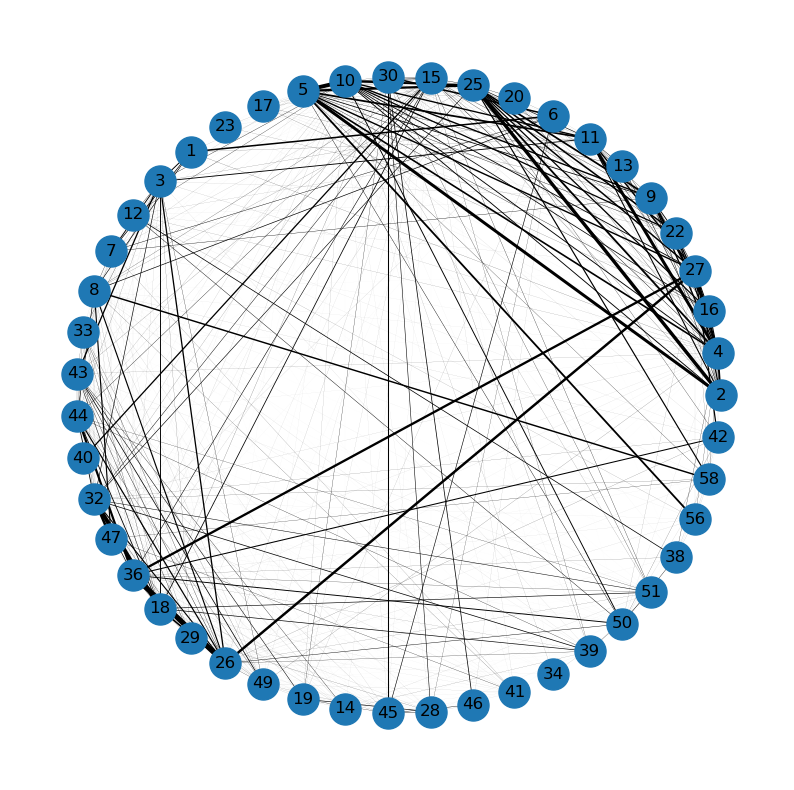

In [11]:
"""
représentation du dataset
"""
# Create a graph
G = nx.Graph()

# Add nodes and weighted edges based on the number of contacts (row count)
for index, row in data_1.iterrows():
    G.add_node(row['ID1_1'])
    G.add_node(row['ID2_1'])
    contact_count = 1  # Count each contact as 1
    if G.has_edge(row['ID1_1'], row['ID2_1']):
        G[row['ID1_1']][row['ID2_1']]['weight'] += contact_count
    else:
        G.add_edge(row['ID1_1'], row['ID2_1'], weight=contact_count)

# Extract edge weights into a list, handling None values
edge_weights = [G[u][v]['weight'] if 'weight' in G[u][v] else 0 for u, v in G.edges()]

# Create a layout for the nodes (e.g., Kamada-Kawai layout)
pos = nx.circular_layout(G)

# Set the figure size
plt.figure(figsize=(10, 10))  # You can adjust the size as needed

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=500)

# Draw edges with varying thickness based on weights
for edge in G.edges(data='weight'):
    weight = edge[2] if edge[2] is not None else 0
    if weight > 0:  # Draw edges only if the weight is greater than 0
        nx.draw_networkx_edges(G, pos, edgelist=[edge], width=weight / 300, edge_color=(0, 0, 0))
nx.draw_networkx_labels(G, pos, font_size=12, font_family="sans-serif")  
     
# Show the graph
plt.axis('off')
plt.show()

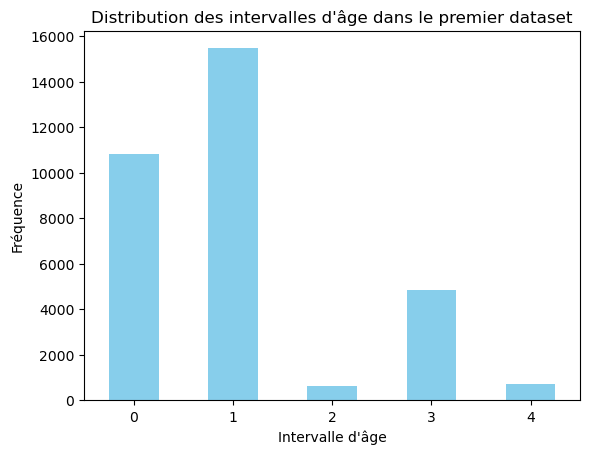

In [ ]:
# Sélectionnez la colonne 'age1_1' du premier dataset
age_intervals = data_1['age1_1']

# Comptez le nombre d'occurrences de chaque intervalle
age_interval_counts = age_intervals.value_counts()

# Triez les intervalles par ordre croissant
age_interval_counts = age_interval_counts.sort_index()

# Créez un graphique à barres
age_interval_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des intervalles d'âge dans le premier dataset")
plt.xlabel("Intervalle d'âge")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)  # Pour faire pivoter les étiquettes de l'axe x
plt.show()

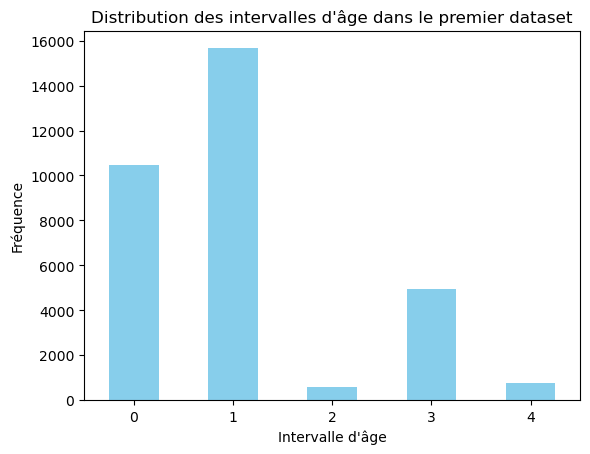

In [ ]:
# Sélectionnez la colonne 'age1_1' du premier dataset
age_intervals = data_1['age2_1']

# Comptez le nombre d'occurrences de chaque intervalle
age_interval_counts = age_intervals.value_counts()

# Triez les intervalles par ordre croissant
age_interval_counts = age_interval_counts.sort_index()

# Créez un graphique à barres
age_interval_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des intervalles d'âge dans le premier dataset")
plt.xlabel("Intervalle d'âge")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)  # Pour faire pivoter les étiquettes de l'axe x
plt.show()

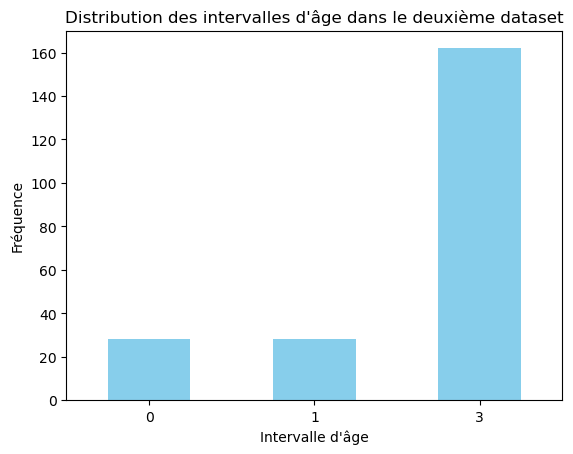

In [ ]:
# Sélectionnez la colonne 'age1_1' du deuxième dataset
age_intervals = data_2['age1_2']

# Comptez le nombre d'occurrences de chaque intervalle
age_interval_counts = age_intervals.value_counts()

# Triez les intervalles par ordre croissant
age_interval_counts = age_interval_counts.sort_index()

# Créez un graphique à barres
age_interval_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des intervalles d'âge dans le deuxième dataset")
plt.xlabel("Intervalle d'âge")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)  # Pour faire pivoter les étiquettes de l'axe x
plt.show()

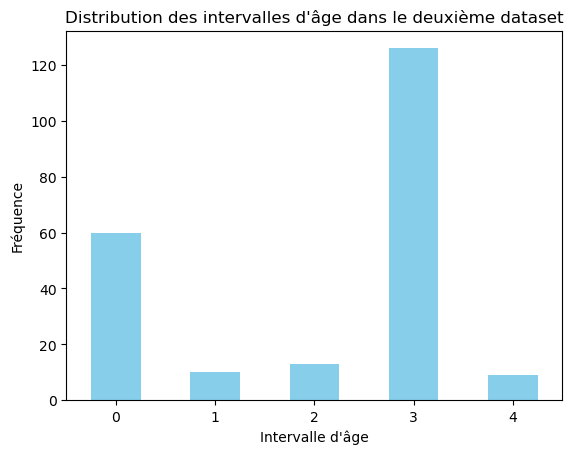

In [ ]:
# Sélectionnez la colonne 'age1_1' du deuxième dataset
age_intervals = data_2['age2_2']

# Comptez le nombre d'occurrences de chaque intervalle
age_interval_counts = age_intervals.value_counts()

# Triez les intervalles par ordre croissant
age_interval_counts = age_interval_counts.sort_index()

# Créez un graphique à barres
age_interval_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution des intervalles d'âge dans le deuxième dataset")
plt.xlabel("Intervalle d'âge")
plt.ylabel("Fréquence")
plt.xticks(rotation=0)  # Pour faire pivoter les étiquettes de l'axe x
plt.show()

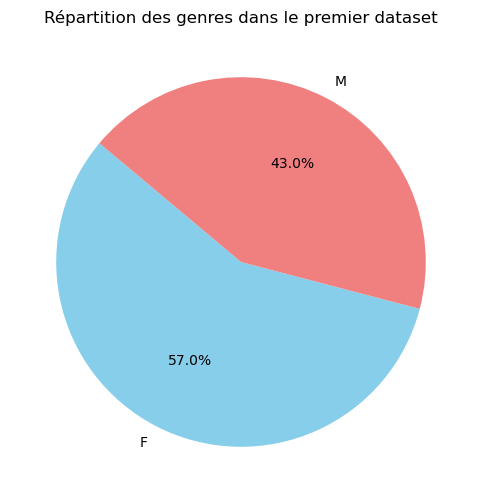

In [ ]:
# Sélectionnez la colonne 'genre1_1' du premier dataset
gender_counts = data_1['genre1_1'].value_counts()

# Créez un graphique à secteurs
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Répartition des genres dans le premier dataset")
plt.show()

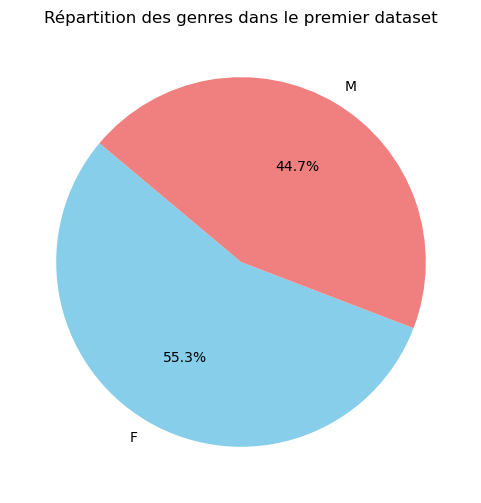

In [ ]:
# Sélectionnez la colonne 'genre1_1' du premier dataset
gender_counts = data_1['genre2_1'].value_counts()

# Créez un graphique à secteurs
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Répartition des genres dans le premier dataset")
plt.show()

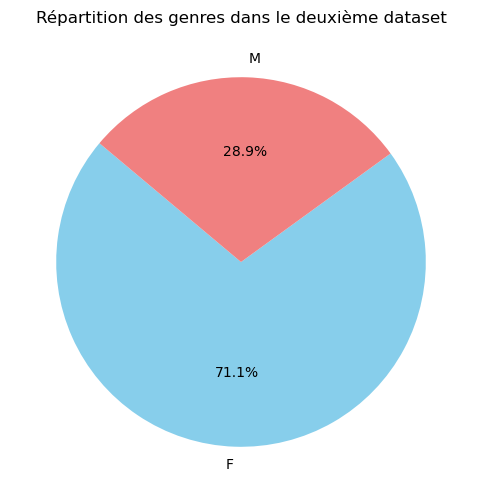

In [ ]:
# Sélectionnez la colonne 'genre1_1' du premier dataset
gender_counts = data_2['genre1_2'].value_counts()

# Créez un graphique à secteurs
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Répartition des genres dans le deuxième dataset")
plt.show()

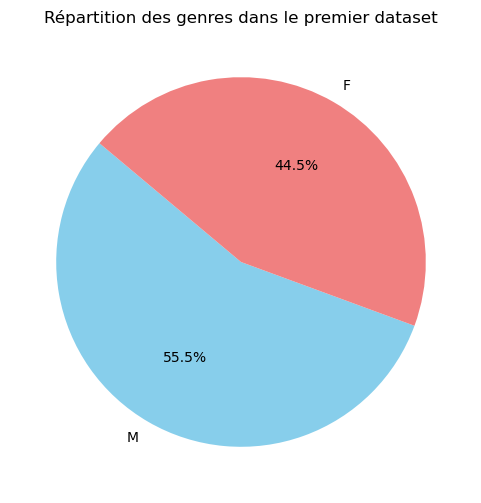

In [ ]:
# Sélectionnez la colonne 'genre1_1' du premier dataset
gender_counts = data_2['genre2_2'].value_counts()

# Créez un graphique à secteurs
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title("Répartition des genres dans le premier dataset")
plt.show()

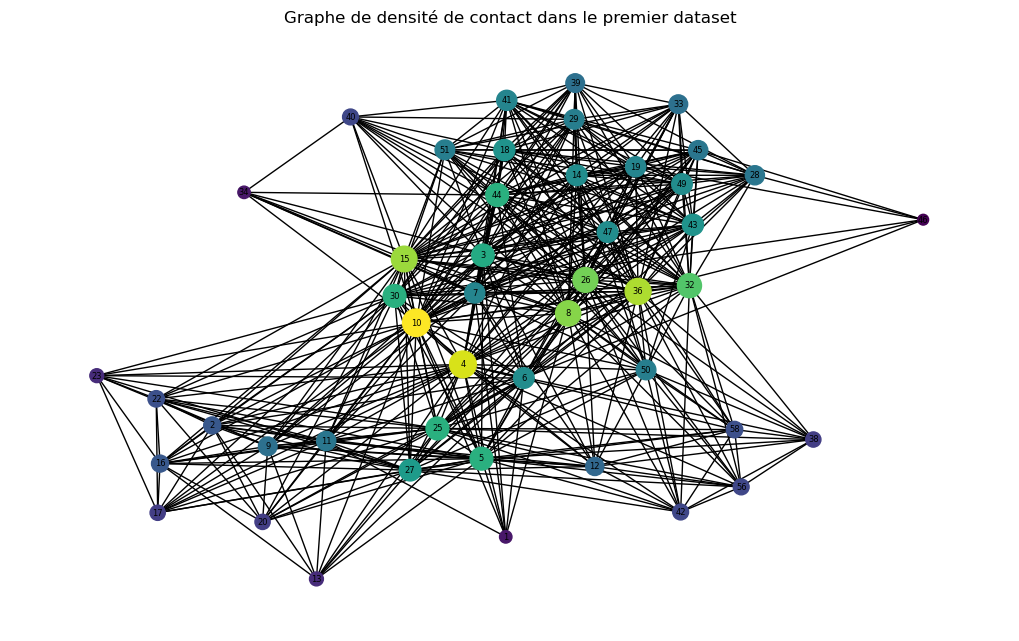

In [ ]:
# Créez un graph à partir du premier dataset
G = nx.Graph()

# Ajoutez des nœuds en tant que personnes des colonnes 'ID1_1' et 'ID2_1'
G.add_nodes_from(data_1['ID1_1'])
G.add_nodes_from(data_1['ID2_1'])

# Ajoutez des arêtes (liens) entre les personnes en utilisant 'ID1_1' et 'ID2_1'
G.add_edges_from(data_1[['ID1_1', 'ID2_1']].values)

# Calculez la densité de contact (degré moyen) pour chaque nœud
contact_density = dict(G.degree())
average_density = np.mean(list(contact_density.values()))

# Créez un graphe de densité de contact
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=[v * 10 for v in contact_density.values()], node_color=list(contact_density.values()), cmap=plt.cm.viridis, font_size=6)
plt.title("Graphe de densité de contact dans le premier dataset")
#plt.colorbar()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_11596\415333042.py:27: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label="Densité de contact")


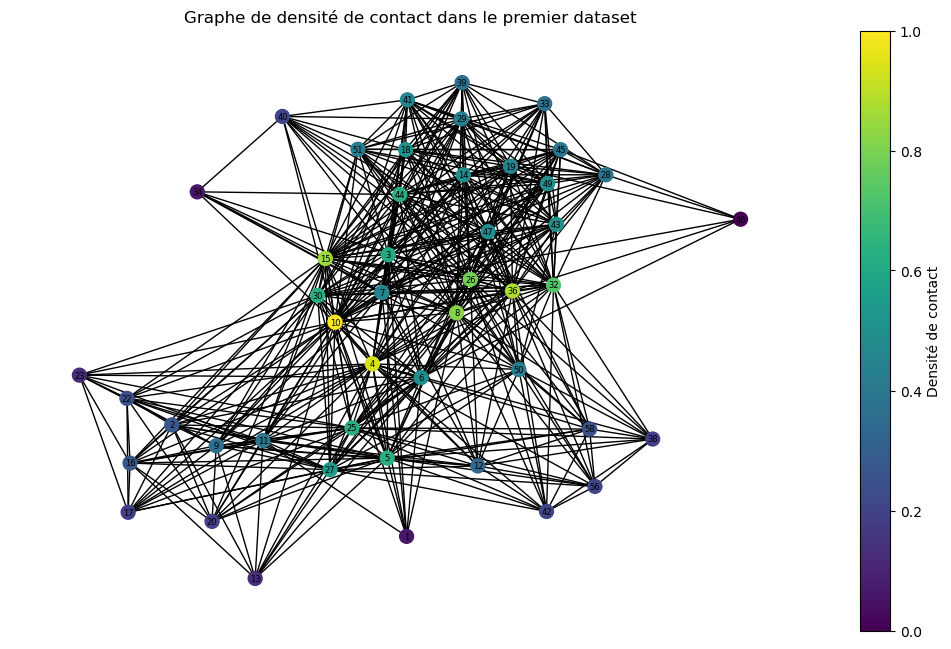

In [ ]:
# Créez un graph à partir du premier dataset
G = nx.Graph()

# Ajoutez des nœuds en tant que personnes des colonnes 'ID1_1' et 'ID2_1'
G.add_nodes_from(data_1['ID1_1'])
G.add_nodes_from(data_1['ID2_1'])

# Ajoutez des arêtes (liens) entre les personnes en utilisant 'ID1_1' et 'ID2_1'
G.add_edges_from(data_1[['ID1_1', 'ID2_1']].values)

# Calculez la densité de contact (degré moyen) pour chaque nœud
contact_density = dict(G.degree())
average_density = np.mean(list(contact_density.values()))

# Créez un graphe de densité de contact en utilisant une carte de couleur
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

# Utilisez la couleur viridis en fonction de la densité de contact
node_colors = [contact_density[n] for n in G.nodes()]
cmap = plt.get_cmap('viridis')

nx.draw(G, pos, with_labels=True, node_size=100, node_color=node_colors, cmap=cmap, font_size=6)

sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
plt.colorbar(sm, label="Densité de contact")

plt.title("Graphe de densité de contact dans le premier dataset")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(
C:\Users\Administrator\AppData\Local\Temp\ipykernel_11596\4291128484.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=max(betweenness_centrality.values()))))


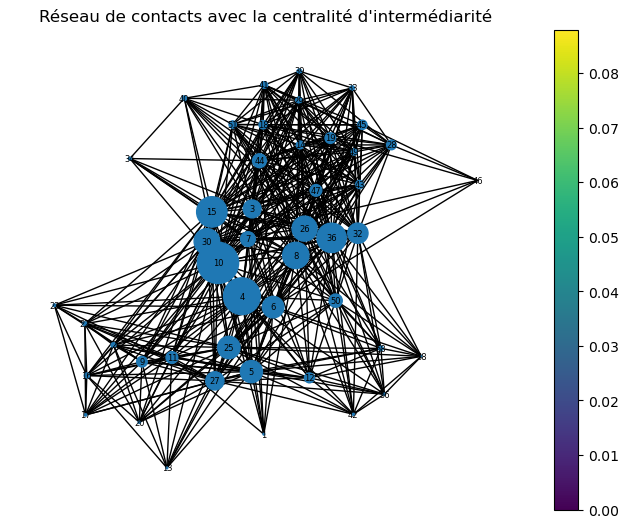

In [ ]:
# Créer un graph à partir du premier dataset
G = nx.Graph()

# Ajouter des nœuds en tant que personnes des colonnes 'ID1_1' et 'ID2_1'
G.add_nodes_from(data_1['ID1_1'])
G.add_nodes_from(data_1['ID2_1'])

# Ajouter des arêtes (liens) entre les personnes en utilisant 'ID1_1' et 'ID2_1'
G.add_edges_from(data_1[['ID1_1', 'ID2_1']].values)

# Calculer la centralité d'intermédiarité
betweenness_centrality = nx.betweenness_centrality(G)

# Dessiner le graph en fonction de la centralité d'intermédiarité
node_size = [10000 * betweenness_centrality[node] for node in G.nodes]
pos = nx.spring_layout(G, seed=42)  # Dispose les nœuds pour une meilleure visualisation
nx.draw(G, pos, with_labels=True, node_size=node_size, font_size=6, cmap=plt.cm.viridis)
plt.title("Réseau de contacts avec la centralité d'intermédiarité")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=max(betweenness_centrality.values()))))
plt.show()

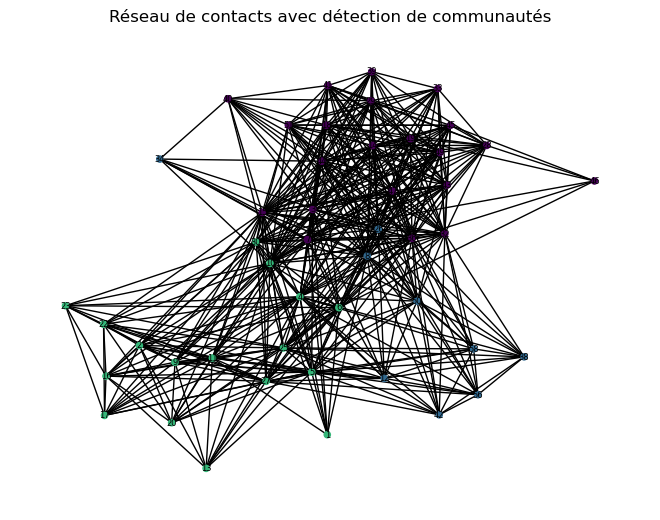

In [18]:
# Créer un graph à partir du premier dataset
G = nx.Graph()

# Ajouter des nœuds en tant que personnes des colonnes 'ID1_1' et 'ID2_1'
G.add_nodes_from(data_1['ID1_1'])
G.add_nodes_from(data_1['ID2_1'])

# Ajouter des arêtes (liens) entre les personnes en utilisant 'ID1_1' et 'ID2_1'
G.add_edges_from(data_1[['ID1_1', 'ID2_1']].values)

# Détection de communautés
partition = community.best_partition(G)

# Dessiner le graph en fonction des communautés
pos = nx.spring_layout(G, seed=42)  # Dispose les nœuds pour une meilleure visualisation
cmap = plt.get_cmap("viridis")
size = len(set(partition.values()))
colors = [cmap(i / size) for i in range(size)]
color_map = [colors[partition[node]] for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=20, font_size=6)
plt.title("Réseau de contacts avec détection de communautés")
plt.show()